We can publish image data with MQTT and view with an appropriate camera, e.g. in HA -> 
* https://www.home-assistant.io/components/camera.mqtt/ 
* https://github.com/home-assistant/home-assistant/blob/dev/homeassistant/components/mqtt/camera.py

Link for publishing -> https://github.com/WakeupTsai/docker-rpi-camera-mqtt/blob/master/image-mqtt.py

In [20]:
from PIL import Image
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import io

import paho.mqtt.client as mqtt

# broker = "localhost"
broker = "192.168.1.164"
topic = 'homie/mac_webcam/capture'
port = 1883

In [2]:
# Reqired callbacks
def on_connect(client, userdata, flags, rc):
    print(f"CONNACK received with code {rc}")
    if rc==0:
        print("connected OK")
    else:
        print("Bad connection Returned code=",rc)

def on_publish(client, userdata, mid):
    print("mid: "+str(mid))     

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic)
    if msg.topic == topic:        
        image = Image.open(io.BytesIO(msg.payload))
        image.save('received.jpg')
        print(f'saved image on {topic}')

In [3]:
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message
client.on_publish = on_publish

#client.username_pw_set(username, password)
client.connect(broker, port=port)
client.loop_start()
client.subscribe(topic)

(0, 1)

CONNACK received with code 0
connected OK


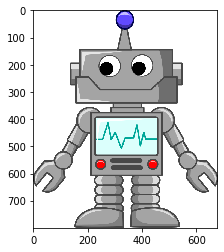

In [10]:
# image_file = 'test_jpg_1.jpg'
image_file = 'test_jpg_2.jpg'
image = Image.open(image_file)
plt.imshow(image);

In [14]:
file = open(image_file, 'rb')
filecontent = file.read()
byteArr = bytearray(filecontent)
print(byteArr[:10])

client.publish(topic, byteArr, qos=1)

bytearray(b'\x89PNG\r\n\x1a\n\x00\x00')


mid: 4
homie/mac_webcam/capture


In [15]:
from PIL import Image
import io

image = Image.open(io.BytesIO(byteArr))

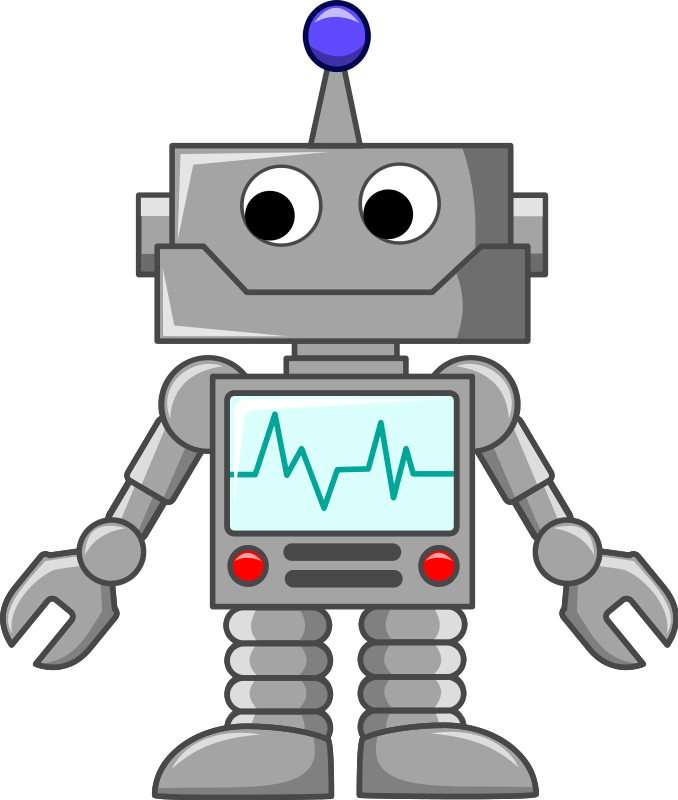

In [17]:
image

In [18]:
image.convert('RGB').save('test_output.jpg')

homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture


In [31]:
datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S.%f")

'2019-07-21_06:34:48.844815'

homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
saved image on homie/mac_webcam/capture
homie/mac_webcam/capture
